# Marketing campaign

## 1 - Data preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

#Loading the dataset
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print(data.head())
print(data.info())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

### Data Dictionary
* **ID**: Unique ID of the Customer.
* **Year_Birth**: Birth year of the customer
* **Education**: The educational level attained by the customer.
* **Marital_Status**: The marital status of the customer.
* **Income**: Annual household income of the customer.
* **Kidhome**: Count of children in the customer's household.
* **Teenhome**: Count of teenagers in the customer's household.
* **Dt_Customer**: Date when the customer registered with the company.
* **Recency**: Days since the customer's last purchase.
* **MntWines**: Expenditure on wines in the past two years.
* **MntFruits**: Expenditure on fruits in the past two years.
* **MntMeatProducts**: Expenditure on meat in the past two years.
* **MntFishProducts**: Expenditure on fish in the past two years.
* **MntSweetProducts**: Expenditure on sweets in the past two years.
* **MntGoldProds**: Expenditure on gold products in the past two years.
* **NumDealsPurchases**: Total number of purchases made with a discount.
* **NumWebPurchases**: Number of purchases made through the company’s website.
* **NumCatalogPurchases**: Number of purchases made using catalogues.
* **NumStorePurchases**: Number of purchases made in physical stores.
* **NumWebVisitsMonth**: Monthly visits to the company's website.
* **AcceptedCmp3**: Whether the offer in the 3rd marketing campaign was accepted (1 = Yes, 0 = No).
* **AcceptedCmp4**: Whether the offer in the 4th marketing campaign was accepted (1 = Yes, 0 = No).
* **AcceptedCmp5**: Whether the offer in the 5th marketing campaign was accepted (1 = Yes, 0 = No).
* **AcceptedCmp1**: Whether the offer in the 1st marketing campaign was accepted (1 = Yes, 0 = No).
* **AcceptedCmp2**: Whether the offer in the 2nd marketing campaign was accepted (1 = Yes, 0 = No).
* **Complain**: Indicates if the customer has made a complaint in the past two years (1 = Yes, 0 = No).
* **Z_CostContact**: Typically a constant value related to contact cost in marketing terms.
* **Z_Revenue**: Typically a constant value related to the revenue goal in marketing terms.
* **Response**: Indicates if the customer accepted the offer in the last marketing campaign (1 = Yes, 0 = No).


In [3]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
#Missing values count
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values[missing_values > 0])


Missing values:
Income    24
dtype: int64


In [5]:
#Filling missing values in 'Income' with the median of the column
data['Income'].fillna(data['Income'].median(), inplace=True)

In [6]:
#COunt unique values
unique_counts = data.nunique().sort_values()
print("Unique counts from lowest to highest:")
print(unique_counts)

Unique counts from lowest to highest:
Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp2              2
Complain                  2
AcceptedCmp1              2
AcceptedCmp5              2
Kidhome                   3
Teenhome                  3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1975
ID                     2240
dtype: int64


Z_Revenue and Z_CostContact do not offer any additional information, we can drop them alongside ID 

In [7]:
data.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

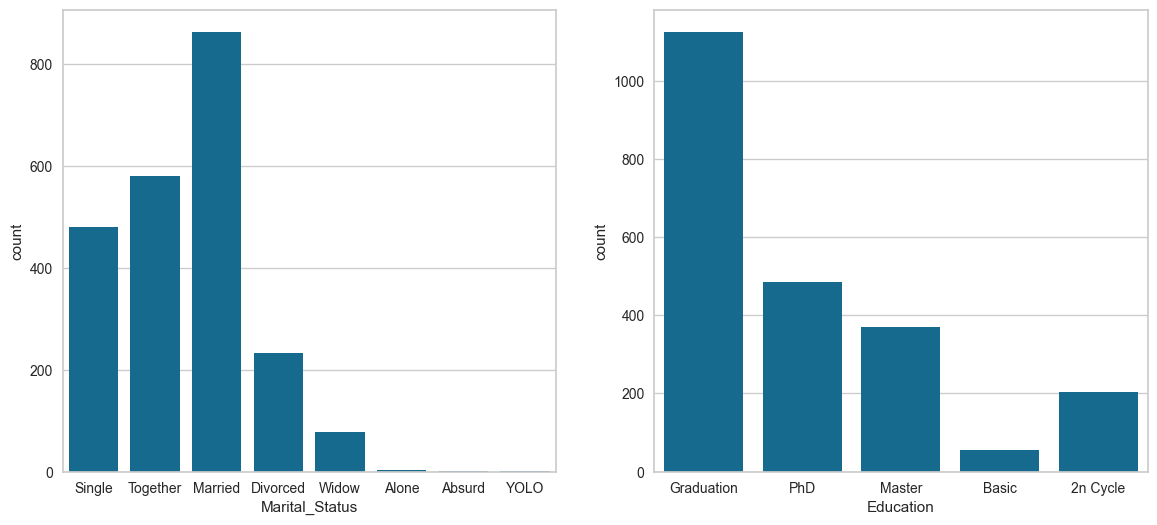

In [8]:
#Make charts for categorical variables
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='Marital_Status', data=data, ax=ax[0])
sns.countplot(x='Education', data=data, ax=ax[1])
plt.show()

In [9]:
#pairplot
#sns.pairplot(data.select_dtypes(include=np.number))
#plt.show()

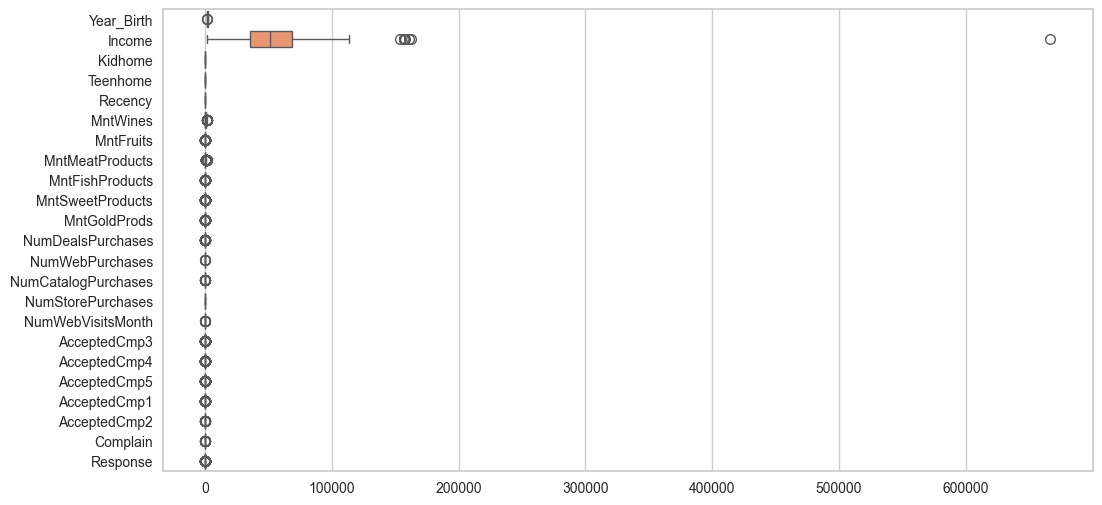

In [10]:
fig, axs = plt.subplots(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=np.number), orient="h", palette="Set2")
plt.show()

In [11]:
data['Income'].max()

666666.0

#### It seems like there is one noticeable outlier in "Income", we proceed to remove it

In [12]:
max_income = data['Income'].max()
data = data[data['Income'] != max_income]

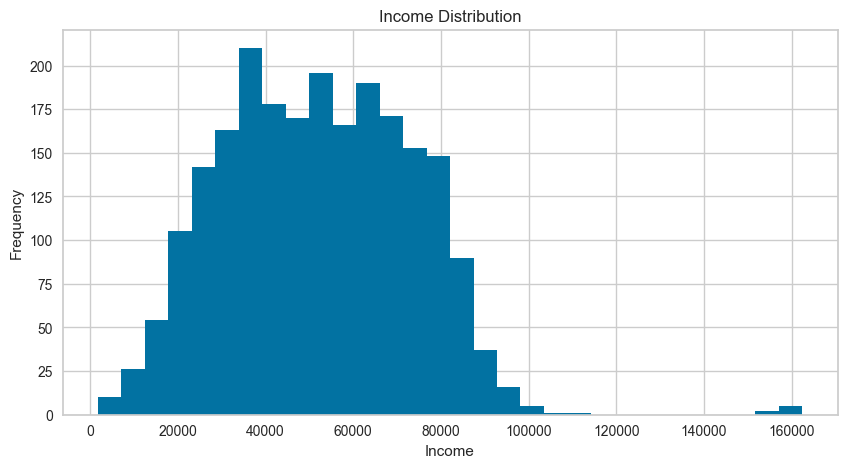

In [13]:
plt.figure(figsize=(10, 5))
data['Income'].hist(bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

#### We will now encode the categorical valued and scale the numerical values using this formula:

$$ Z = \frac{(X - \mu)}{\sigma} $$



In [14]:
#Label encode all categorical features
le = LabelEncoder()
for column in data.select_dtypes(include=[object]).columns:
    data[column] = le.fit_transform(data[column])

#Standard scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=np.number))

data.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,1968.802144,2.393926,3.729343,51963.554712,0.443948,0.506476,328.007593,49.121036,304.067441,26.307727,...,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,0.149174
std,11.985494,1.125018,1.076183,21410.672116,0.538390,0.544555,190.105157,28.963662,336.614830,39.781468,...,2.923542,3.251149,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.356339
min,1893.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,2.000000,3.000000,35533.500000,0.000000,0.000000,164.000000,24.000000,24.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,2.000000,4.000000,51381.500000,0.000000,0.000000,326.000000,49.000000,174.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,3.000000,5.000000,68277.500000,1.000000,1.000000,485.000000,74.000000,504.500000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,4.000000,7.000000,162397.000000,2.000000,2.000000,662.000000,99.000000,1493.000000,199.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
scaled_data_df = pd.DataFrame(scaled_data, columns=data.select_dtypes(include=np.number).columns)

In [16]:
scaled_data_df.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,...,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03
mean,2.736732e-15,3.966853e-17,-9.203099e-17,-6.505639e-17,-1.745415e-17,-1.586741e-17,1.047249e-16,3.411494e-17,-4.125527e-17,-4.601550e-17,...,6.029617e-17,-8.489066e-17,1.872355e-16,5.553594e-17,1.983427e-17,6.029617e-17,5.156909e-17,-1.586741e-18,-4.522213e-17,-6.346965e-18
std,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,...,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,-6.325903e+00,-2.128376e+00,-3.466119e+00,-2.346716e+00,-8.247688e-01,-9.302817e-01,-1.725786e+00,-1.696333e+00,-9.035115e-01,-6.614538e-01,...,-9.110149e-01,-1.781745e+00,-2.190805e+00,-2.802077e-01,-2.838987e-01,-2.802077e-01,-2.621738e-01,-1.165367e-01,-9.730359e-02,-4.187220e-01
25%,-8.180166e-01,-3.502291e-01,-6.778649e-01,-7.675483e-01,-8.247688e-01,-9.302817e-01,-8.629131e-01,-8.675232e-01,-8.321975e-01,-6.363109e-01,...,-9.110149e-01,-8.587881e-01,-9.545086e-01,-2.802077e-01,-2.838987e-01,-2.802077e-01,-2.621738e-01,-1.165367e-01,-9.730359e-02,-4.187220e-01
50%,9.996448e-02,-3.502291e-01,2.515530e-01,-2.719133e-02,-8.247688e-01,-9.302817e-01,-1.056279e-02,-4.179831e-03,-3.864847e-01,-4.603102e-01,...,-2.267605e-01,-2.434836e-01,2.817880e-01,-2.802077e-01,-2.838987e-01,-2.802077e-01,-2.621738e-01,-1.165367e-01,-9.730359e-02,-4.187220e-01
75%,6.841343e-01,5.388445e-01,1.180971e+00,7.621241e-01,1.033035e+00,9.064914e-01,8.260032e-01,8.591635e-01,5.955689e-01,1.682635e-01,...,4.574939e-01,6.794732e-01,6.938869e-01,-2.802077e-01,-2.838987e-01,-2.802077e-01,-2.621738e-01,-1.165367e-01,-9.730359e-02,-4.187220e-01
max,2.269738e+00,1.427918e+00,3.039807e+00,5.159021e+00,2.890839e+00,2.743264e+00,1.757275e+00,1.722507e+00,3.532816e+00,4.341993e+00,...,8.668547e+00,2.217734e+00,6.051173e+00,3.568781e+00,3.522384e+00,3.568781e+00,3.814264e+00,8.580987e+00,1.027711e+01,2.388220e+00


In [17]:
#Let's combine multiple features into 2 and reduce the dimesionality
scaled_data_df['NumberOfKids'] = scaled_data_df['Kidhome'] + scaled_data_df['Teenhome']
scaled_data_df['Expenditure'] = scaled_data_df['MntWines'] + scaled_data_df['MntFruits'] + scaled_data_df['MntMeatProducts'] + scaled_data_df['MntFishProducts'] + scaled_data_df['MntSweetProducts'] + scaled_data_df['MntGoldProds']
to_drop = ['Kidhome', 'Teenhome', 
                   'MntWines', 'MntFruits', 'MntMeatProducts', 
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
scaled_data_df.drop(columns=to_drop, inplace=True)

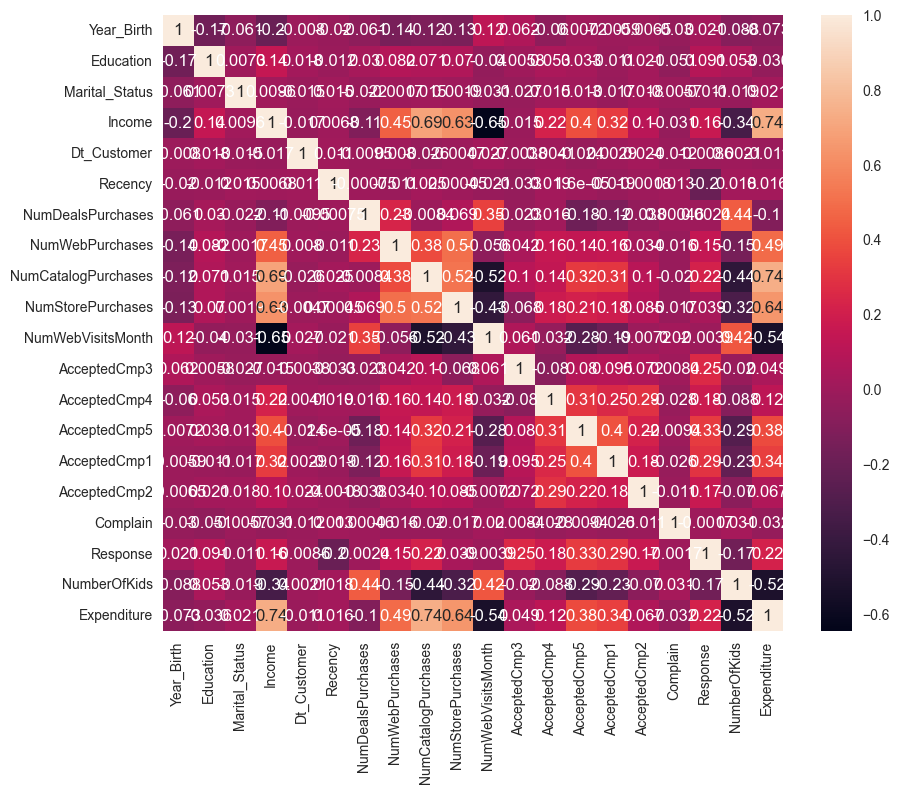

In [18]:
#Correlation matrix
corr_matrix = scaled_data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

The correlation matrix is very hard to read, let's try to display only the features that are correlated 0.6 and above

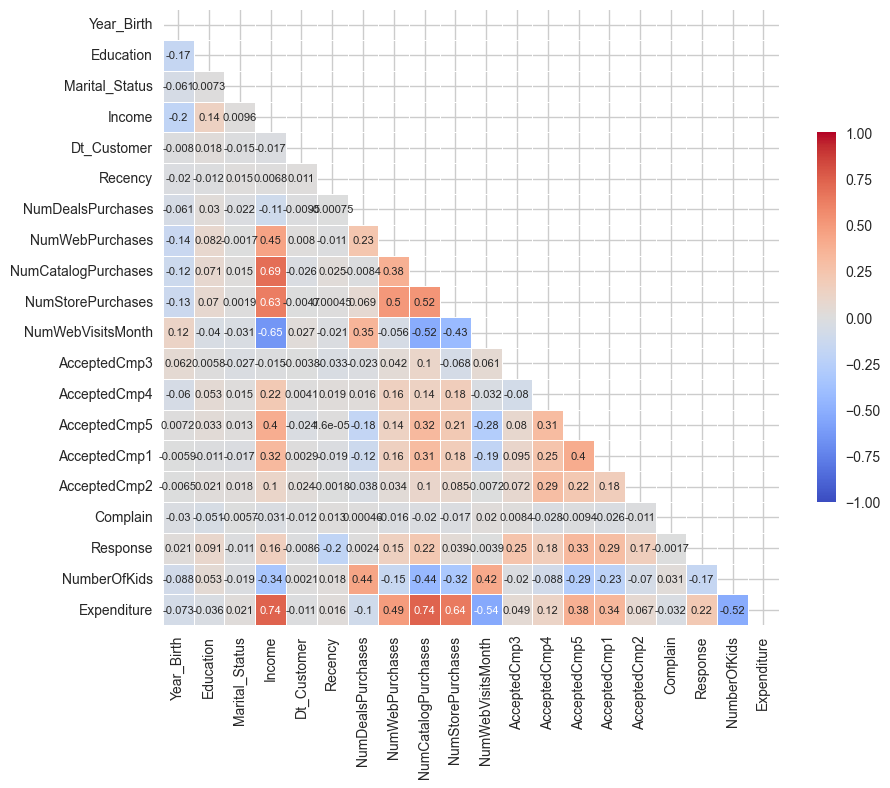

In [19]:
#Correlation matrix for features that present .6 or more as a coefficient.
corr_matrix = scaled_data_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, 
            annot_kws={"size": 8})
plt.show()

In [20]:
#Find feature pairs with high correlation
high_corr = corr_matrix.abs().stack().reset_index()
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr = high_corr[high_corr['Feature1'] != high_corr['Feature2']]
high_corr = high_corr[high_corr['Correlation'] > 0.7]
high_corr.sort_values(by='Correlation', ascending=False, inplace=True)
print(high_corr)

                Feature1             Feature2  Correlation
179  NumCatalogPurchases          Expenditure     0.738655
388          Expenditure  NumCatalogPurchases     0.738655
79                Income          Expenditure     0.735948
383          Expenditure               Income     0.735948


These are the most correlated features. We still see that the correlation is just above 0.70, even though this result in almost a linear relationship between the two, we decide to keep them both because they are relevat to the business context.

Let's use multiple criteria to determine the best number of clusters.

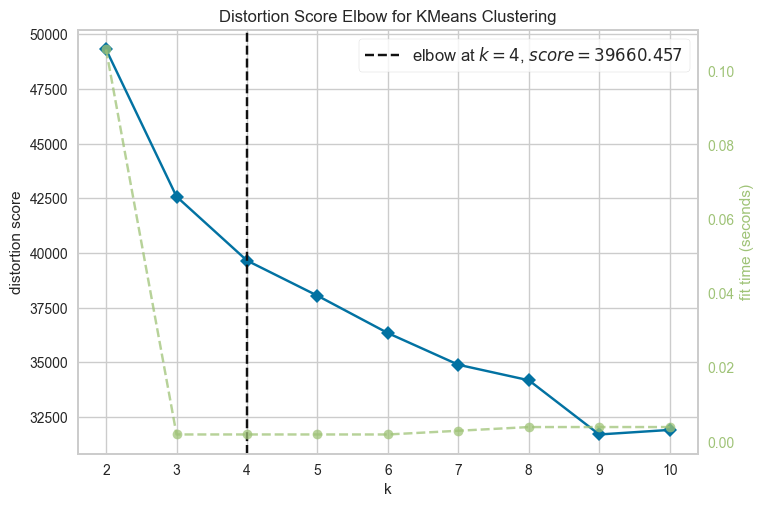

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
#Elbow method
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_data_df)
Elbow_M.show()

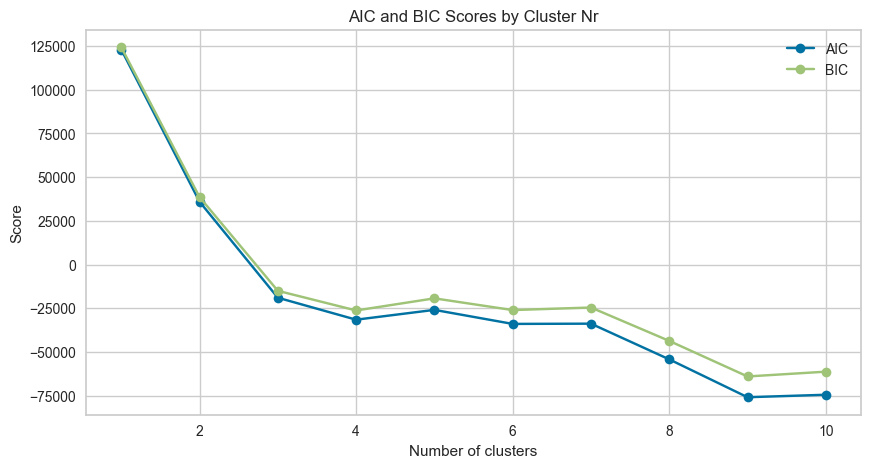

In [22]:
#GMM to determine AIC and BIC
n_clusters = range(1, 11)
aic_scores = []
bic_scores = []
for k in n_clusters:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_data_df)
    aic_scores.append(gmm.aic(scaled_data_df))
    bic_scores.append(gmm.bic(scaled_data_df))

#plot AIC and BIC scores
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, aic_scores, label='AIC', marker='o')
plt.plot(n_clusters, bic_scores, label='BIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores by Cluster Nr')
plt.legend()
plt.grid(True)
plt.show()

The Elbow method, the AIC (Akaike Information Criterion), and the BIC (Bayesian Information Criterion) methods all agree that the right number of clusters to maximise cluster separation is 4.

## 2 - Modeling

#### PCA (Principal Component Analysis) 
We will use the PCA to reducec the dimensionality of our large dataset. PCA will transform a large set of variables into a smaller one without losing too much information. We will reduce the number of dimensions to 2 and 3 to better visualize the informations.

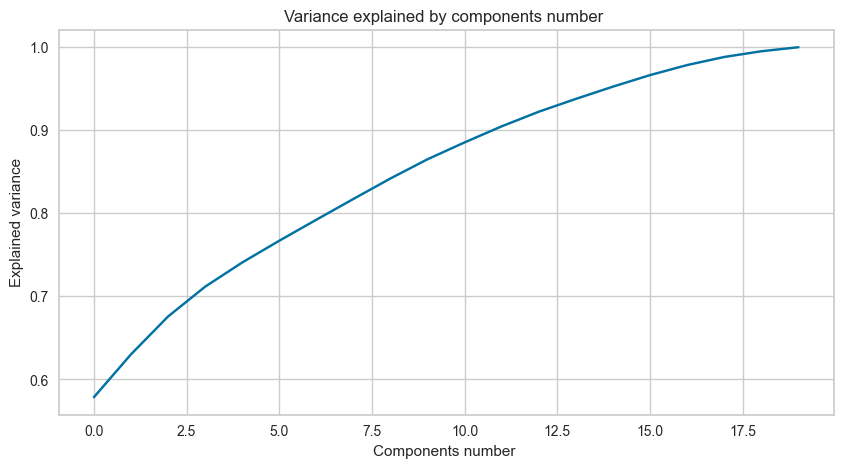

In [23]:
pca = PCA()
pca.fit(scaled_data_df)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Components number ')
plt.ylabel('Explained variance')
plt.title('Variance explained by components number ')
plt.grid(True)
plt.show()

In [24]:
#PCA for 2D reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data_df)

#new dataframe to store the pcs reduction
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

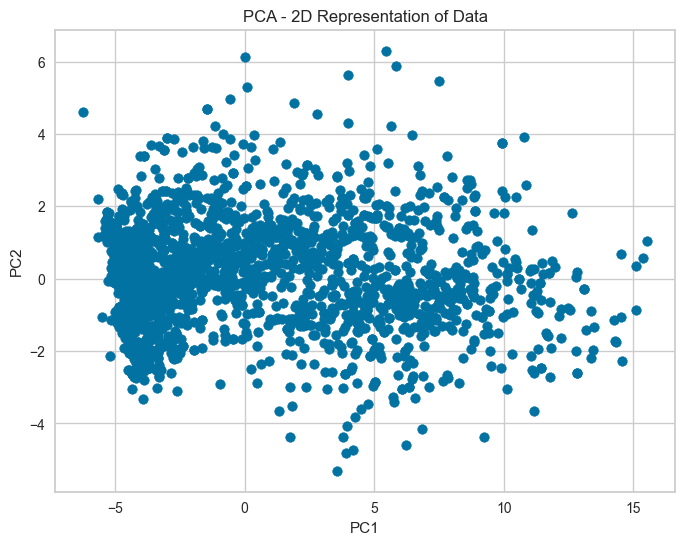

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - 2D Representation of Data')
plt.grid(True)
plt.show()

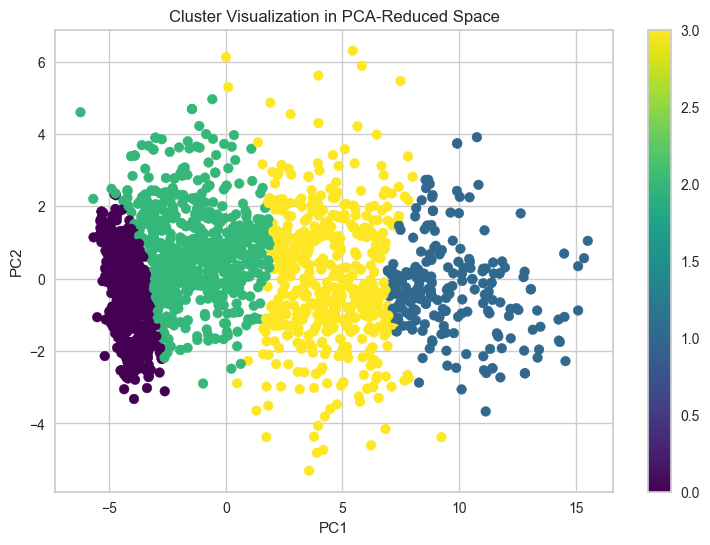

In [26]:
#Apply GMM on PCA 2D data
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(pca_df)
labels = gmm.predict(pca_df)

#Visualise in 2D with different colors for clusters
plt.figure(figsize=(9, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization in PCA-Reduced Space')
plt.colorbar()
plt.grid(True)
plt.show()

### KNN Clustering using K-Means

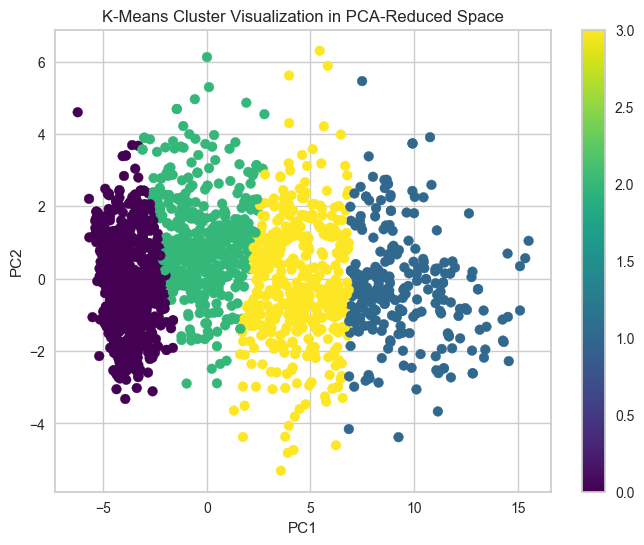

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_df)
labels = kmeans.predict(pca_df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Cluster Visualization in PCA-Reduced Space')
plt.colorbar()
plt.grid(True)
plt.show()

#### Below there's a section dedicated to an alternative way of visualising the clusters like we did in MLDM lab 5
</br>
The code below is inspired by professor Alireza' code from lab 5 of Machine Learning and Data mining module at University of Surrey 2023/2024

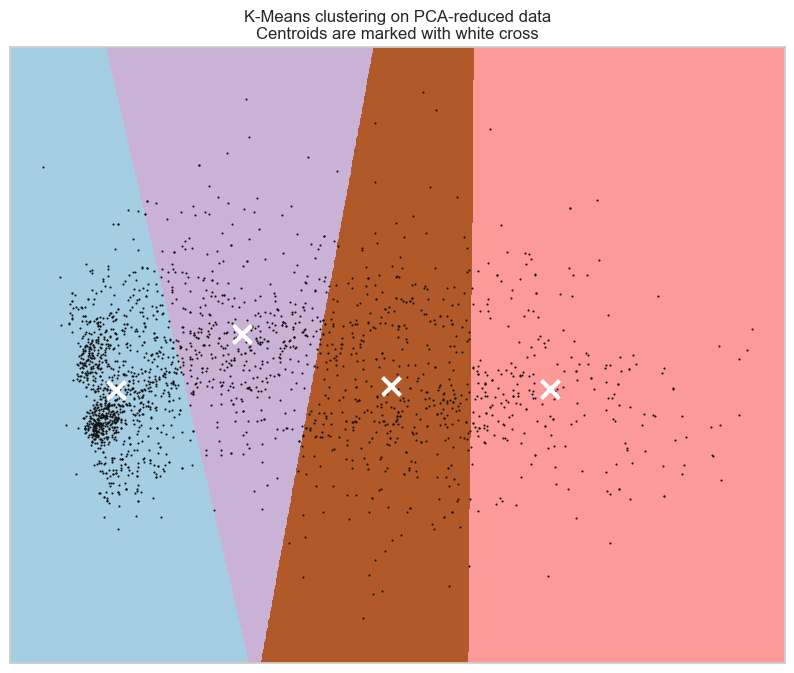

In [37]:
#K means cluster with decision boundary
h = .02  # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1
y_min, y_max = pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

#Color plotting
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(pca_df['PC1'], pca_df['PC2'], 'k.', markersize=3)
#Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-Means clustering on PCA-reduced data\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Clustering Evaluation

* Homogeneity Score
* Completeness Score
* V-Measure Score
* Adjusted Rand Index
* Adjusted Mutual Information Score
* Average Distance to Cluster Center
* Average Distance to Other Center
* Maximum Distance to Cluster Center
* Silhouette Score

GMM      	2	0.07s	1.000	1.000	1.000	1.000	1.000	0.410
K-Means  	2	0.06s	0.919	0.926	0.923	0.956	0.923	0.477

Combined Metrics:
         Average Distance to Cluster Center  Average Distance to Other Center  \
GMM                                1.795401                          7.831691   
K-Means                            1.774183                          7.654306   

         Maximum Distance to Cluster Center  Silhouette  Homogeneity  \
GMM                                7.548253    0.409594     1.000000   
K-Means                            6.561207    0.477230     0.919368   

         Completeness  V-Measure  Adjusted Rand Index  Adjusted Mutual Info  
GMM          1.000000   1.000000             1.000000              1.000000  
K-Means      0.926245   0.922794             0.956111              0.922668  


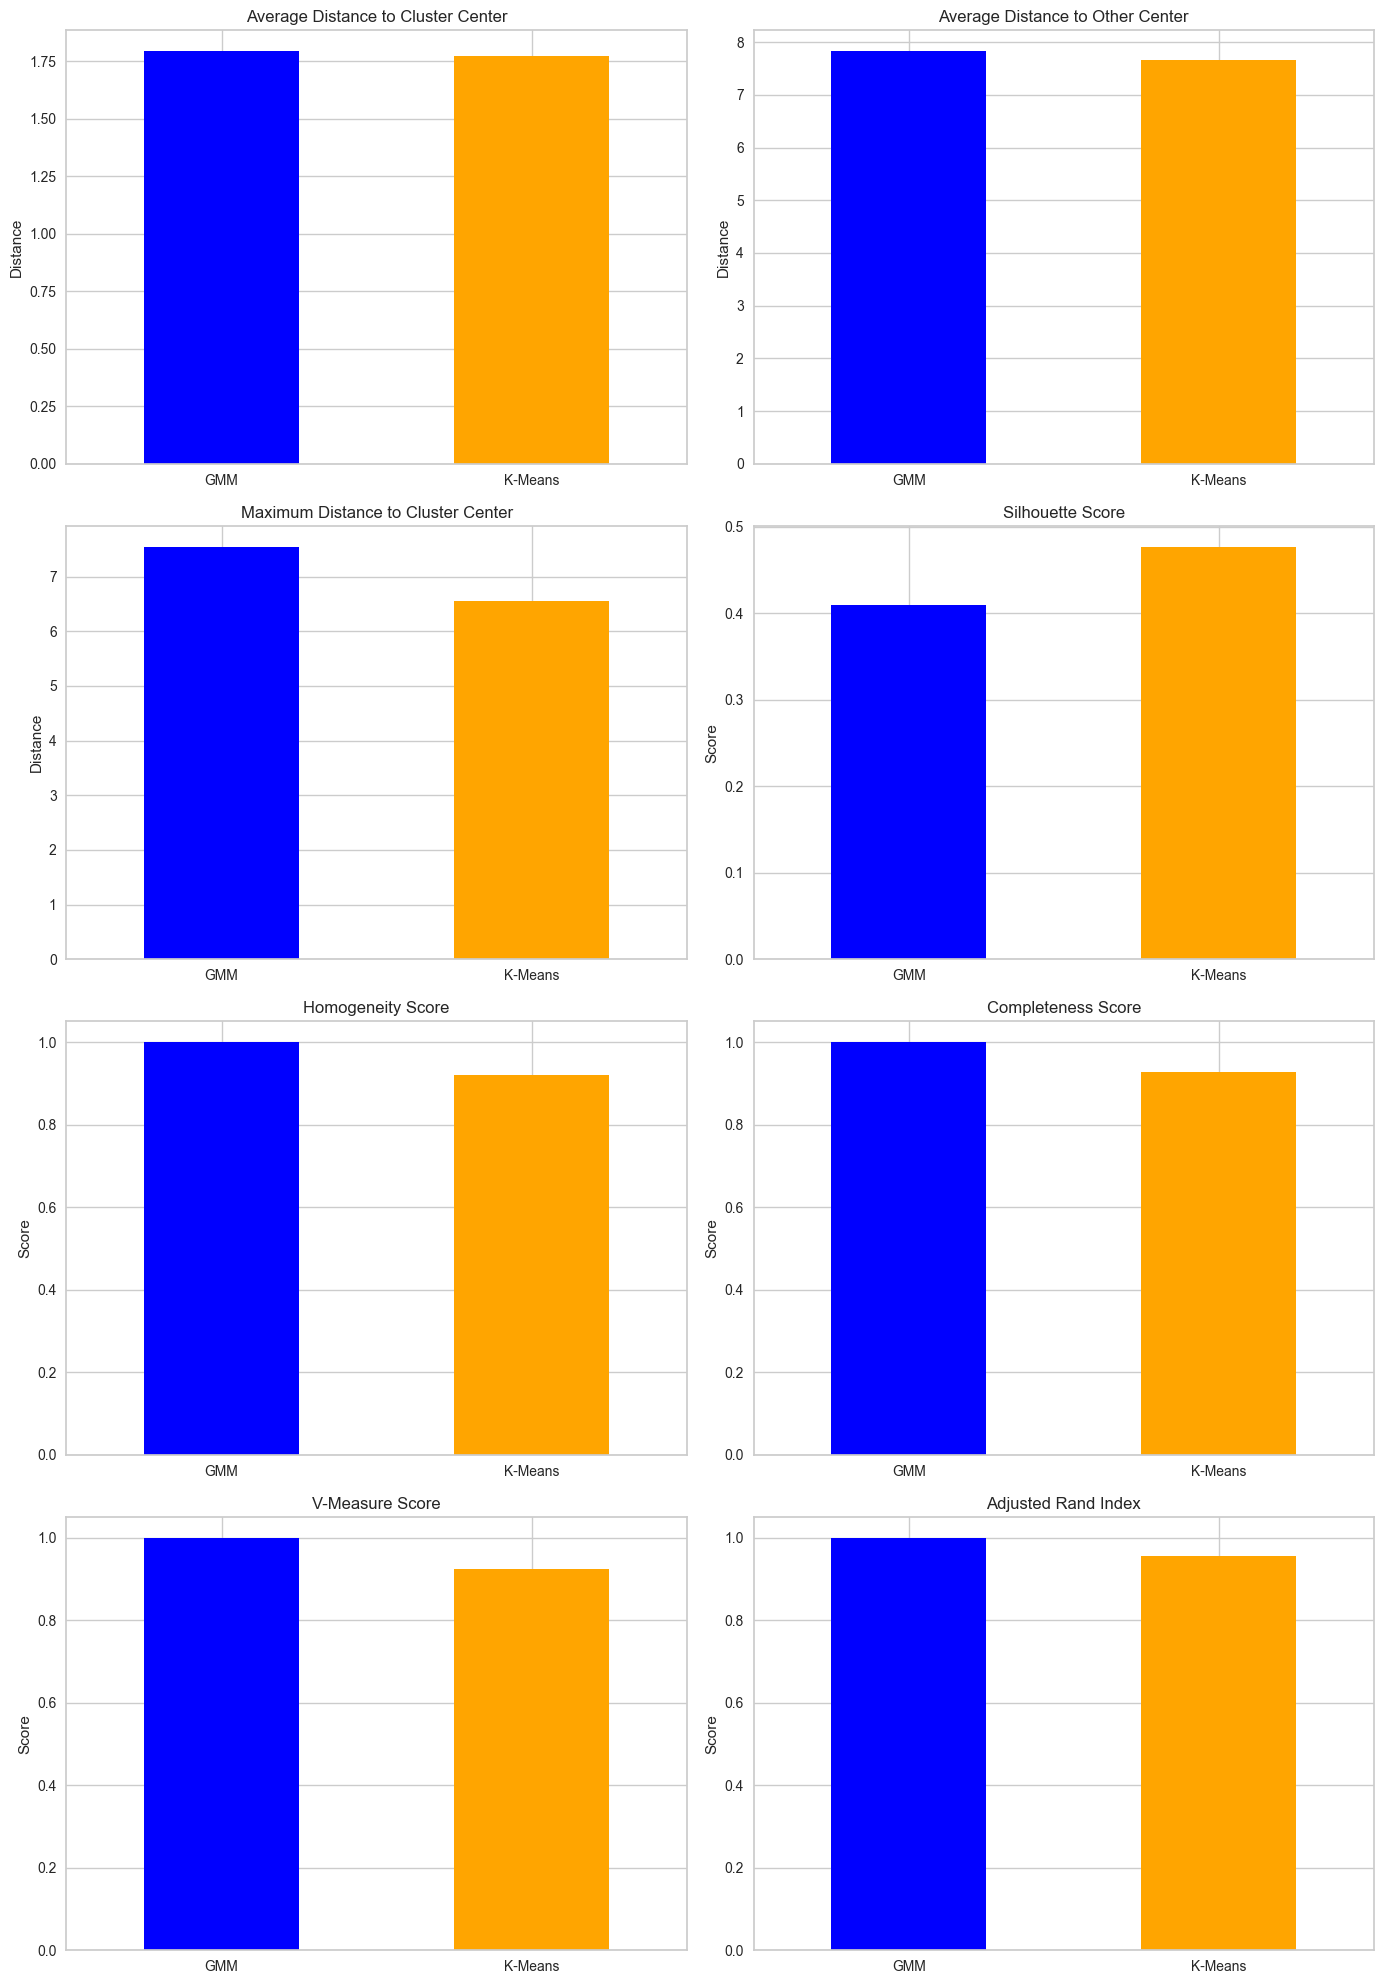

In [34]:
from sklearn import metrics
from time import time

def calculate_custom_metrics(data, labels, centers):
    n_clusters = len(np.unique(labels))
    avg_distance_to_center = []
    avg_distance_to_other_center = []
    max_distance_to_center = []
    for i in range(n_clusters):
        cluster_points = data[labels == i]
        other_clusters = data[labels != i]
        avg_distance_to_center.append(np.mean(np.linalg.norm(cluster_points - centers[i], axis=1)))
        avg_distance_to_other_center.append(np.mean([np.linalg.norm(point - centers[j])
                                                     for j in range(n_clusters) if j != i
                                                     for point in cluster_points]))
        max_distance_to_center.append(np.max(np.linalg.norm(cluster_points - centers[i], axis=1)))
    silhouette = metrics.silhouette_score(data, labels)

    return {
        'Average Distance to Cluster Center': np.mean(avg_distance_to_center),
        'Average Distance to Other Center': np.mean(avg_distance_to_other_center),
        'Maximum Distance to Cluster Center': np.max(max_distance_to_center),
        'Silhouette': silhouette
    }

#function to calculate professor's metrics form lab 5
def calculate_professor_metrics(estimator, name, data, labels):
    t0 = time()
    estimator.fit(data)
    homogeneity = metrics.homogeneity_score(labels, estimator.predict(data))
    completeness = metrics.completeness_score(labels, estimator.predict(data))
    v_measure = metrics.v_measure_score(labels, estimator.predict(data))
    adjusted_rand = metrics.adjusted_rand_score(labels, estimator.predict(data))
    adjusted_mutual_info = metrics.adjusted_mutual_info_score(labels, estimator.predict(data))
    silhouette = metrics.silhouette_score(data, estimator.predict(data), metric='euclidean')

    print('%-9s\t%i\t%.2fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, data.shape[1], (time() - t0),
             homogeneity, completeness, v_measure, adjusted_rand,
             adjusted_mutual_info, silhouette))

    return {
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-Measure': v_measure,
        'Adjusted Rand Index': adjusted_rand,
        'Adjusted Mutual Info': adjusted_mutual_info,
        'Silhouette': silhouette
    }

#Perform PCA again
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

#Apply again the models, we will obtain the same results as before 
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(pca_df)
gmm_labels = gmm.predict(pca_df)
gmm_centers = gmm.means_
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_df)
kmeans_labels = kmeans.predict(pca_df)
kmeans_centers = kmeans.cluster_centers_

#GMM
gmm_custom_metrics = calculate_custom_metrics(pca_df.values, gmm_labels, gmm_centers)
gmm_professor_metrics = calculate_professor_metrics(GaussianMixture(n_components=4, random_state=42), "GMM", pca_df.values, gmm_labels)

#K-Means
kmeans_custom_metrics = calculate_custom_metrics(pca_df.values, kmeans_labels, kmeans_centers)
kmeans_professor_metrics = calculate_professor_metrics(KMeans(init='k-means++', n_clusters=4, n_init=10, random_state=42), "K-Means", pca_df.values, kmeans_labels)
all_metrics = {
    'GMM': {**gmm_custom_metrics, **gmm_professor_metrics},
    'K-Means': {**kmeans_custom_metrics, **kmeans_professor_metrics}
}

metrics_df = pd.DataFrame(all_metrics).T

print("\nCombined Metrics:")
print(metrics_df)
fig, axes = plt.subplots(4, 2, figsize=(14, 20))
metrics_df['Average Distance to Cluster Center'].plot(kind='bar', ax=axes[0, 0], color=['blue', 'orange'], rot=0)
axes[0, 0].set_title('Average Distance to Cluster Center')
axes[0, 0].set_ylabel('Distance')
metrics_df['Average Distance to Other Center'].plot(kind='bar', ax=axes[0, 1], color=['blue', 'orange'], rot=0)
axes[0, 1].set_title('Average Distance to Other Center')
axes[0, 1].set_ylabel('Distance')
metrics_df['Maximum Distance to Cluster Center'].plot(kind='bar', ax=axes[1, 0], color=['blue', 'orange'], rot=0)
axes[1, 0].set_title('Maximum Distance to Cluster Center')
axes[1, 0].set_ylabel('Distance')
metrics_df['Silhouette'].plot(kind='bar', ax=axes[1, 1], color=['blue', 'orange'], rot=0)
axes[1, 1].set_title('Silhouette Score')
axes[1, 1].set_ylabel('Score')
metrics_df['Homogeneity'].plot(kind='bar', ax=axes[2, 0], color=['blue', 'orange'], rot=0)
axes[2, 0].set_title('Homogeneity Score')
axes[2, 0].set_ylabel('Score')
metrics_df['Completeness'].plot(kind='bar', ax=axes[2, 1], color=['blue', 'orange'], rot=0)
axes[2, 1].set_title('Completeness Score')
axes[2, 1].set_ylabel('Score')
metrics_df['V-Measure'].plot(kind='bar', ax=axes[3, 0], color=['blue', 'orange'], rot=0)
axes[3, 0].set_title('V-Measure Score')
axes[3, 0].set_ylabel('Score')
metrics_df['Adjusted Rand Index'].plot(kind='bar', ax=axes[3, 1], color=['blue', 'orange'], rot=0)
axes[3, 1].set_title('Adjusted Rand Index')
axes[3, 1].set_ylabel('Score')

fig.tight_layout()
plt.show()